# Documentation

# Question 1 

I chose Simmulated Annealing as a stochastic optimiser for Task 3 

# Question 2 Why did you choose this optimiser?

The spring relies on multiple variables making the graphical image of what the data might look like very complex, this means 
we cannot just choose a simple algorithm to optimise the problem and a stochastic approach would be beneficial.
Simulated annealing allows distortion to be added to the data set to avoid getting stuck at a local minima,
this normally allows a good optimal to be found. Simulated annealing works better with continuous function approximation 
than GA algorithms. As f(x) is a continuous function this makes simulated annealing the better option that should be implemented
to solve this problem. [99 words]

# Question 3 What constraint handling method(s) are you using and why?

To handle the inequality constraints of g1 to g4 and to keep all the simulated annealing points within the feasible space I
have used death penalties. Any combinations of values (x1, x2, x3) that do not pass g1 to g4 are rejected as these would 
produce an f(x) outside of the feasible region and take up more computational power than necessary.


In [1]:
import numpy as np
import math
import random
import matplotlib as mpl
import matplotlib.pyplot as plt 

#make the random number predicatable 
np.random.seed(250599)

In [2]:
arr_X = np.array([1, 2, 3])

# Task 1 implementation of f(x)
Question 1

: the diameter of the wire (x0), 
the mean of the diameter of coil(x1)
and the number of active coils (x2)

In [3]:
def f(x, fCount=[0]):
    fun = float(x[0] ** 2)*x[1]*(2 + x[2])
#     print(fun)
    fCount[0]+=1
    return [fun, fCount[0]]

def g1(x, g1Count=[0]):
    g1Count[0]+=1
    fun = float(1 - (((x[1]**3)*x[2])/(71785*(x[0]**4))))
    if ( fun <= 0) :
        return [True, g1Count[0]]
    else:
        return [False, g1Count[0]]
    
def g2(x, g2Count=[0]):
    fun = (   (((4*x[1]**2) - (x[0]*x[1]))/(12566*((x[1]*(x[0]**3))-(x[0]**4)))) + (1/(5108*(x[0]**2)))  - 1 )
    g2Count[0]+=1
    if fun <= 0:
        return[True, g2Count[0]]
    else:
        return[False, g2Count[0]]
    
def g3(x, g3Count=[0]):
    fun = (1 - (140.45*x[0])/((x[1]**2)*x[2]))
    g3Count[0]+=1
    if fun <= 0:   
        return[True, g3Count[0]]
    else:
        return[False, g3Count[0]]
    
def g4(x, g4Count=[0]):
    fun = (  ((x[0] + x[1])/1.5)-1  )
    g4Count[0]+=1
    if fun <= 0:   
        return[True, g4Count[0]]
    else:
        return[False, g4Count[0]]
    

In [4]:
print(f(arr_X))
print(f(arr_X))
print(f(arr_X))

print (g1(arr_X))
print (g1(arr_X))
print (g1(arr_X))

print (g2(arr_X))
print (g2(arr_X))
print (g2(arr_X))

print (g3(arr_X))
print (g3(arr_X))
print (g3(arr_X))

print (g4(arr_X))
print (g4(arr_X))
print (g4(arr_X))  

[10.0, 1]
[10.0, 2]
[10.0, 3]
[False, 1]
[False, 2]
[False, 3]
[True, 1]
[True, 2]
[True, 3]
[True, 1]
[True, 2]
[True, 3]
[False, 1]
[False, 2]
[False, 3]


# Task 2 - Random Search

In [5]:
wire_lower = 0.005 #lower bound for diameter of the wire
wire_upper = 2 #upper bound for diameter of the wire

coil_lower = 0.25 #lower bound for diameter of coil
coil_upper = 1.3 #upper bound for diameter of the coil

coil_num_lower = 2 #lower bound for number of active coils
coil_num_upper = 15 #upper bound for number of active coils

In [6]:
def generate_random_array():
    #generate random number 
    x0 = np.random.uniform(low=wire_lower, high=wire_upper) #hightest + 1
    x1 = np.random.uniform(low=coil_lower, high=coil_upper) #hightest + 1
    x2 = np.random.uniform(low=coil_num_lower, high=coil_num_upper) #hightest + 1
    
    return np.array([x0, x1, x2])
    

In [7]:
def is_feasible(array):
    feasible = False
    g1_arr=g1(array)
    g2_arr=g2(array)
    g3_arr=g3(array)
    g4_arr=g4(array)

#     print(g1_arr)
#     print(g2_arr)
#     print(g3_arr)
#     print(g4_arr)

    if g1_arr[0] and g2_arr[0] and g3_arr[0] and g4_arr[0] :
        feasible = True
    else:
        feasible = False
    return feasible
    

In [8]:
def random_search(best_fx, best_x):
    
    arr_x = generate_feasible_random_array()
    
    fx = f(arr_x)
    if fx < best_fx:
        best_x = np.array([arr_x[0], arr_x[1], arr_x[2]])
#             print("best replaced")
            
    return best_x

In [9]:
def generate_feasible_random_array():
    array = generate_random_array()
    feasible = is_feasible(array)
    while not feasible:
        array = generate_random_array()
        feasible = is_feasible(array)
    return array

In [10]:
best_x = generate_feasible_random_array()
best_fx = f(best_x)

for x in range(0, 3000):
    best_x = random_search(best_fx, best_x)
print(best_x)
print(best_fx)
#print(arr_X)

#myArray = np.array(arrX)
#print(myArray)

# test = np.array([1, 2, 3])
#print (g1(arr_X))
# # #def searching(arr_X, best_X, best_fx):



[ 0.06366318  0.46211897 14.15396812]
[0.11361189700149761, 4]


# Task 3 - Simulated Annealing

In [11]:
def distort(array):
    x0 = array[0]
    x1 = array[1]
    x2 = array[2]
    
    x0_new = 1000 #not feasible to begin with
    x1_new = 1000 #not feasible to begin with
    x2_new = 1000 #not feasible to begin with
    
    while not is_feasible(np.array([x0_new, x1, x2])):
        x0_new = np.random.normal(x0, 1)
#     print("i did go here")
    
    while not is_feasible(np.array([x0_new, x1_new, x2])):
        x1_new = np.random.normal(x1,1)
#     print("i did go here")
    
    while not is_feasible(np.array([x0_new, x1_new, x2_new])):
        x2_new = np.random.normal(x2,1)
#     print("i did go here")
   # print(str(x0_new) + " " + str(x1_new) + " " + str(x2_new))
        
    return [x0_new, x1_new, x2_new]

In [12]:
#test of distort method
start_values_array = generate_feasible_random_array()
print(start_values_array)
print(distort(start_values_array))

[0.07074678 0.83362987 7.97025529]
[0.06809615964830923, 0.7106454387248528, 8.801431737906302]


#to get minimum fx
#aka the energy
#when system goes through change of configuratioj we have to calculate delta e, change in energy

#how do we chnge te configuration - randomly change the configuration c, making a move

#temperature start with max temp and then slowly decreases to t min

#for every value of temperature 
    #compute energy 
    #change config and get energy of new config
    #calculate change in energy 
    #if change in e is -ve
        #accept the move
    #else if
        #the closer we get to the end of the cycle, the less likely we are to accept bad decisions
        #compute prob e^ change in e/temperature > rand(0,1)
        #accept the move
#step 1 random 

#step 2 more careful

In [18]:
def simulated_annealing():
    
    start_values_array = generate_feasible_random_array()
    print("lets start at random " + str(start_values_array))
    best_fx = f(start_values_array)
    print("best fx so far " + str(best_fx))

        #for every value of temperature 
        #do for number of iterations
    temp_max = 3000
    temp_min = 0
    for t in range(temp_max, temp_min, -1):
        #     print(t)

            #new config
        #     print("finding neighboring set of values to compare")
        new_neighbours = distort(start_values_array)
        #     print(new_neighbours)
        new_fx = f(new_neighbours)

            #calculae change in energy
        #     print("finding delta e")
        delta_fx = new_fx[0] - best_fx[0]
        #     print(str(new_fx) + " " + str(best_fx))

        if delta_fx < 0:
            print("new delta e in the house by merit " + str(t) +" " + str(new_fx))
            best_fx = new_fx
                #print("I was bested")
        elif ((math.exp(delta_fx/t)) < random.uniform(0, 1)):
            print("new delta e in the house by probability" + str(t) +" " + str(new_fx))
            best_fx = new_fx
                #print(math.exp(delta_fx/t))
        #     print(math.exp(delta_fx/t))
    return best_fx

simulated_annealing()
print("finished")
    

lets start at random [ 0.08994777  0.81864538 14.19440388]
best fx so far [0.10726092671270877, 135049]
new delta e in the house by merit 3000 [0.07843801532021355, 135050]
new delta e in the house by merit 2999 [0.06593598203307217, 135051]
new delta e in the house by merit 2995 [0.05304667583876263, 135055]
new delta e in the house by merit 2987 [0.04381332815485, 135063]
new delta e in the house by merit 2940 [0.04277857478470698, 135110]
new delta e in the house by merit 2937 [0.0369436034755121, 135113]
new delta e in the house by merit 2739 [0.036123218012040804, 135311]
new delta e in the house by merit 1328 [0.035471841671878, 136722]
finished


# Task 4 - Repeations

In [14]:
#task 4 random search

lowest_fx = 1000
highest_fx = 0

best_fx_array = np.array([])
best_x_values = np.array([])

for x in range(0, 21):
    #random search
    best_x = generate_feasible_random_array()
    best_fx = f(best_x)

    for x in range(best_fx[1], (best_fx[1]+3000)):
        best_x = random_search(best_fx, best_x)
        
    best_fx_array = np.append(best_fx_array, best_fx)   
    best_x_values = np.append(best_x_values, best_x)                 
    
    print(best_fx[0])
    print(lowest_fx)
    
    if (float(best_fx[0]) > highest_fx):
        highest_fx = best_fx[0]
    
    if (float(best_fx[0]) < lowest_fx):
        lowest_fx = best_fx[0]
    

print(best_fx_array)
print(best_x_values)
    
print(lowest_fx)
print(highest_fx)
    

0.0953722299205464
1000
0.042363305287606956
0.0953722299205464
0.11093210906038044
0.042363305287606956
0.04685525892019255
0.042363305287606956
0.08952234070316015
0.042363305287606956
0.029708824013983157
0.042363305287606956
0.03108156639943068
0.029708824013983157
0.08239314102547882
0.029708824013983157
0.050919023688454884
0.029708824013983157
0.03773749759497468
0.029708824013983157
0.08226215899649372
0.029708824013983157
0.07505207222575587
0.029708824013983157
0.09196699485664396
0.029708824013983157
0.02472467660268997
0.029708824013983157
0.09725713239119278
0.02472467660268997
0.10937270695967145
0.02472467660268997
0.057132916649443234
0.02472467660268997
0.1392775783069256
0.02472467660268997
0.0807058408516351
0.02472467660268997
0.07408576109773819
0.02472467660268997
0.059360811911651726
0.02472467660268997
[9.53722299e-02 6.00600000e+03 4.23633053e-02 9.00700000e+03
 1.10932109e-01 1.20080000e+04 4.68552589e-02 1.50090000e+04
 8.95223407e-02 1.80100000e+04 2.9708824

In [19]:
#task 4 simulated annealing

lowest_fx_sa = 1000
highest_fx_sa = 0

best_fx_array_sa = np.array([])

for x in range(0, 21):
    best_fx_sa = simulated_annealing()
    
    best_fx_array_sa = np.append(best_fx_array_sa, best_fx_sa)             
    
    if (float(best_fx_sa[0]) > highest_fx_sa):
        highest_fx_sa = best_fx_sa[0]
    
    if (float(best_fx_sa[0]) < lowest_fx_sa):
        lowest_fx_sa = best_fx_sa[0]

print(best_fx_array_sa)
print(best_fx_sa)
    
print(lowest_fx_sa)
print(highest_fx_sa)

lets start at random [0.07202268 0.98611518 2.91086923]
best fx so far [0.02512028472950334, 138050]
new delta e in the house by merit 2995 [0.02487094807053075, 138056]
new delta e in the house by merit 2988 [0.022104010944880962, 138063]
new delta e in the house by merit 2975 [0.020766230772680746, 138076]
new delta e in the house by merit 2940 [0.02056064288980868, 138111]
new delta e in the house by merit 2518 [0.019896007925791822, 138533]
new delta e in the house by merit 2483 [0.01978968743474924, 138568]
new delta e in the house by merit 1710 [0.0190857046643375, 139341]
lets start at random [ 0.07906488  0.65590145 12.26733733]
best fx so far [0.058499042675892086, 141051]
new delta e in the house by merit 2999 [0.04405078382166739, 141053]
new delta e in the house by merit 2997 [0.03376395803835887, 141055]
new delta e in the house by merit 2967 [0.029142387091851036, 141085]
new delta e in the house by merit 2928 [0.02778984094375128, 141124]
new delta e in the house by meri

new delta e in the house by merit 2881 [0.02698169831104903, 171181]
new delta e in the house by merit 2857 [0.02654706784290961, 171205]
new delta e in the house by merit 2763 [0.025890598078306064, 171299]
new delta e in the house by merit 2689 [0.025077560814162052, 171373]
new delta e in the house by merit 2120 [0.024588640348133052, 171942]
new delta e in the house by merit 2006 [0.02416850745617652, 172056]
new delta e in the house by merit 1719 [0.023835767141932536, 172343]
new delta e in the house by merit 730 [0.02374109643498796, 173332]
new delta e in the house by merit 303 [0.023060919790798072, 173759]
lets start at random [0.08801673 0.98498056 8.10330715]
best fx so far [0.07709418860330698, 174062]
new delta e in the house by merit 2998 [0.07148704093355873, 174065]
new delta e in the house by merit 2997 [0.04981652868093604, 174066]
new delta e in the house by merit 2993 [0.04572266599460353, 174070]
new delta e in the house by merit 2985 [0.03785733864758237, 174078]

NameError: name 'best_x_values_sa' is not defined

<IPython.core.display.Javascript object>


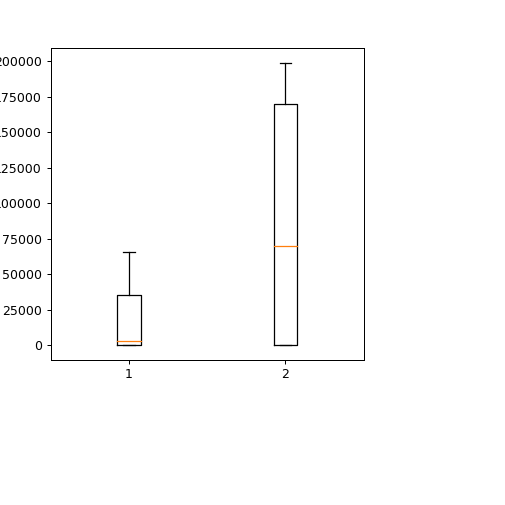

In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import tkinter

# Fixing random state for reproducibility

random_data = best_fx_array
sa_data = best_fx_array_sa
data = [random_data, sa_data]

fig = plt.figure(figsize =(5, 5)) 

# Creating axes instance 
ax = fig.add_subplot() #axis
  
# Creating plot 
bp = ax.boxplot(data) 
  
# show plot 
plt.show() 



# Performances

Simmulated annealing produces worse results 

In [23]:
print(best_fx_array)
print(best_fx_array_sa)

[9.53722299e-02 6.00600000e+03 4.23633053e-02 9.00700000e+03
 1.10932109e-01 1.20080000e+04 4.68552589e-02 1.50090000e+04
 8.95223407e-02 1.80100000e+04 2.97088240e-02 2.10110000e+04
 3.10815664e-02 2.40120000e+04 8.23931410e-02 2.70130000e+04
 5.09190237e-02 3.00140000e+04 3.77374976e-02 3.30150000e+04
 8.22621590e-02 3.60160000e+04 7.50520722e-02 3.90170000e+04
 9.19669949e-02 4.20180000e+04 2.47246766e-02 4.50190000e+04
 9.72571324e-02 4.80200000e+04 1.09372707e-01 5.10210000e+04
 5.71329166e-02 5.40220000e+04 1.39277578e-01 5.70230000e+04
 8.07058409e-02 6.00240000e+04 7.40857611e-02 6.30250000e+04
 5.93608119e-02 6.60260000e+04]
[1.90857047e-02 1.39341000e+05 2.28015638e-02 1.41923000e+05
 4.05540997e-02 1.45379000e+05 2.70042103e-02 1.48087000e+05
 8.33035734e-02 1.51274000e+05 2.50375418e-02 1.53302000e+05
 3.27129220e-02 1.56798000e+05 1.76271957e-02 1.61747000e+05
 2.49105809e-02 1.64751000e+05 2.45948234e-02 1.67469000e+05
 2.95550243e-02 1.70348000e+05 2.30609198e-02 1.73759